# Energy1_Dataset_Analysis


In [2]:
### Importing all the necessary modules for data analysis

In [2]:
import pandas as pd 
import numpy as np 
import requests
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# We define that we want the 1st table on the page
# pd.options.display.float_format = '{:,.2f}'.format # Show numbers in 2 d.p
# using secure request  module


url = 'https://en.wikipedia.org/wiki/List_of_countries_by_electricity_production'
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

content = requests.get(url, headers=header)
energy_df = pd.read_html(content.text)[0]
energy_df


Location Total (TWh)[1]  \
                                         Location Total (TWh)[1]   
0                                           World       30853.00   
1                                           China       10073.00   
2                                   United States        4387.00   
3                                           India        2058.00   
4                                          Russia        1221.00   
..                                            ...            ...   
208                                      Kiribati           0.04   
209                                         Nauru           0.04   
210                              Falkland Islands           0.01   
211                                    Montserrat           0.01   
212  Saint Helena, Ascension and Tristan da Cunha           0.01   

    Generation (TWh)[1]                                                   \
                   Coal     Gas   Hydro Nuclear    Wind    Solar    Oil*   
0               10587.0  6796.0  4419.0    2765  2497.0  2131.00  857.00   
1                5860.0   303.0  1354.0     445   992.0   834.00   76.00   
2                 653.0  1865.0   236.0     782   453.0   303.00   30.00   
3                1534.0    57.0   156.0      54    82.0   134.00    4.00   
4                 225.0   538.0   210.0     216     6.0     3.00   13.00   
..                  ...     ...     ...     ...     ...      ...     ...   
208                 0.0     0.0     0.0       0     0.0     0.01    0.03   
209                 0.0     0.0     0.0       0     0.0     0.00    0.04   
210                 0.0     0.0     0.0       0     0.0     0.00    0.01   
211                 0.0     0.0     0.0       0     0.0     0.00    0.01   
212                 0.0     0.0     0.0       0     0.0     0.00    0.01   

                  Year  
      Bio.  Geo.  Year  
0    712.0  89.0  2024  
1    208.0   0.0  2024  
2     47.0  18.0  2024  
3     36.0   0.0  2024  
4      0.9   0.0  2024  
..     ...   ...   ...  
208    0.0   0.0  2023  
209    0.0   0.0  2023  
210    0.0   0.0  2023  
211    0.0   0.0  2023  
212    0.0   0.0  2023  

[213 rows x 12 columns]

In [4]:
# Delete a level of a multilevel column name and display the first 5 rows
energy_df.columns = energy_df.columns.droplevel()
energy_df.head(5)

,Location,Total (TWh)[1],Coal,Gas,Hydro,Nuclear,Wind,Solar,Oil*,Bio.,Geo.,Year
0,World,30853.0,10587.0,6796.0,4419.0,2765,2497.0,2131.0,857.0,712.0,89.0,2024
1,China,10073.0,5860.0,303.0,1354.0,445,992.0,834.0,76.0,208.0,0.0,2024
2,United States,4387.0,653.0,1865.0,236.0,782,453.0,303.0,30.0,47.0,18.0,2024
3,India,2058.0,1534.0,57.0,156.0,54,82.0,134.0,4.0,36.0,0.0,2024
4,Russia,1221.0,225.0,538.0,210.0,216,6.0,3.0,13.0,0.9,0.0,2024


In [5]:
# investigating the column data
energy_df.columns

Index(['Location', 'Total (TWh)[1]', 'Coal', 'Gas', 'Hydro', 'Nuclear', 'Wind',
       'Solar', 'Oil*', 'Bio.', 'Geo.', 'Year'],
      dtype='object')

In [6]:
# Rename country column and confirming the column name
energy_df.rename(columns={"Total (TWh)[1]": "Total", "Oil*": "Oil", "Bio.": "Bio", "Geo.": "Geo"},inplace=True)
energy_df

,Location,Total,Coal,Gas,Hydro,Nuclear,Wind,Solar,Oil,Bio,Geo,Year
0,World,30853.00,10587.0,6796.0,4419.0,2765,2497.0,2131.00,857.00,712.0,89.0,2024
1,China,10073.00,5860.0,303.0,1354.0,445,992.0,834.00,76.00,208.0,0.0,2024
2,United States,4387.00,653.0,1865.0,236.0,782,453.0,303.00,30.00,47.0,18.0,2024
3,India,2058.00,1534.0,57.0,156.0,54,82.0,134.00,4.00,36.0,0.0,2024
4,Russia,1221.00,225.0,538.0,210.0,216,6.0,3.00,13.00,0.9,0.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
208,Kiribati,0.04,0.0,0.0,0.0,0,0.0,0.01,0.03,0.0,0.0,2023
209,Nauru,0.04,0.0,0.0,0.0,0,0.0,0.00,0.04,0.0,0.0,2023
210,Falkland Islands,0.01,0.0,0.0,0.0,0,0.0,0.00,0.01,0.0,0.0,2023
211,Montserrat,0.01,0.0,0.0,0.0,0,0.0,0.00,0.01,0.0,0.0,2023


In [7]:
# Counting how many rows with NaN values 
energy_df.isna().sum()

Location    0
Total       0
Coal        0
Gas         0
Hydro       0
Nuclear     0
Wind        0
Solar       0
Oil         0
Bio         0
Geo         0
Year        0
dtype: int64

In [8]:
# checking the dataframe statistical data summary
energy_df.describe()

,Total,Coal,Gas,Hydro,Nuclear,Wind,Solar,Oil,Bio,Geo,Year
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,288.476620,99.472770,63.672066,41.256103,25.835681,23.294178,19.411455,8.011690,6.626150,0.831033,2023.009390
std,2241.551749,834.086979,484.420844,318.455930,200.735760,186.438180,158.063751,59.975246,51.176772,6.431127,0.237729
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.080000,0.000000,0.000000,2023.000000
50%,11.000000,0.000000,0.200000,0.700000,0.000000,0.010000,0.100000,0.600000,0.030000,0.000000,2023.000000
75%,55.000000,2.000000,16.000000,10.000000,0.000000,1.000000,1.000000,2.000000,0.600000,0.000000,2023.000000
max,30853.000000,10587.000000,6796.000000,4419.000000,2765.000000,2497.000000,2131.000000,857.000000,712.000000,89.000000,2024.000000


In [9]:
# investigating all records for its uniqueness of values ie. ensuring that there are no invalid characters
all_lists = list(energy_df.columns)
for records  in all_lists:
    print(set(energy_df[records]))


{'Switzerland', 'Egypt', 'Slovenia', 'Morocco', 'Bhutan', 'Kyrgyzstan', 'Indonesia', 'Senegal', 'Italy', 'Poland', 'Kuwait', 'British Virgin Islands', 'Mexico', 'Cook Islands', 'Bolivia', 'Azerbaijan', 'Latvia', 'Portugal', 'Solomon Islands', 'Peru', 'United Arab Emirates', 'Brazil', 'American Samoa', 'Falkland Islands', 'Tanzania', 'Bangladesh', 'Kazakhstan', 'DR Congo', 'Thailand', 'Bosnia and Herzegovina', 'Réunion', 'Cyprus', 'Maldives', 'Guinea-Bissau', 'Algeria', 'Czech Republic', 'Madagascar', 'Paraguay', 'Mauritania', 'Oman', 'Angola', 'Armenia', 'Nepal', 'Tonga', 'Luxembourg', 'Greece', 'Liberia', 'Libya', 'Eritrea', 'Iran', 'Uzbekistan', 'Puerto Rico', 'French Guiana', 'Saint Lucia', 'Spain', 'Turkey', 'North Macedonia', 'Botswana', 'Panama', 'Djibouti', 'Malawi', 'Philippines', 'Sweden', 'Central African Republic', 'Togo', 'France', 'Singapore', 'Faroe Islands', 'Namibia', 'Saudi Arabia', 'São Tomé and Príncipe', 'Montserrat', 'Jordan', 'Dominican Republic', 'Saint Kitts and

In [10]:
# investigating the data type summary before conversion
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  213 non-null    object 
 1   Total     213 non-null    float64
 2   Coal      213 non-null    float64
 3   Gas       213 non-null    float64
 4   Hydro     213 non-null    float64
 5   Nuclear   213 non-null    int64  
 6   Wind      213 non-null    float64
 7   Solar     213 non-null    float64
 8   Oil       213 non-null    float64
 9   Bio       213 non-null    float64
 10  Geo       213 non-null    float64
 11  Year      213 non-null    int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 20.1+ KB


In [11]:
# checking the first 5 records to confirm previous structure
energy_df.head()

,Location,Total,Coal,Gas,Hydro,Nuclear,Wind,Solar,Oil,Bio,Geo,Year
0,World,30853.0,10587.0,6796.0,4419.0,2765,2497.0,2131.0,857.0,712.0,89.0,2024
1,China,10073.0,5860.0,303.0,1354.0,445,992.0,834.0,76.0,208.0,0.0,2024
2,United States,4387.0,653.0,1865.0,236.0,782,453.0,303.0,30.0,47.0,18.0,2024
3,India,2058.0,1534.0,57.0,156.0,54,82.0,134.0,4.0,36.0,0.0,2024
4,Russia,1221.0,225.0,538.0,210.0,216,6.0,3.0,13.0,0.9,0.0,2024


In [12]:
# Selecting column headers for int
int_data_columns = list(energy_df.select_dtypes(include='int').columns)
print(int_data_columns)

['Nuclear', 'Year']


In [13]:
# transforming and confirming the transformed data types
for column in int_data_columns:
    energy_df[column] = energy_df[column].astype ('int16') #

energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  213 non-null    object 
 1   Total     213 non-null    float64
 2   Coal      213 non-null    float64
 3   Gas       213 non-null    float64
 4   Hydro     213 non-null    float64
 5   Nuclear   213 non-null    int16  
 6   Wind      213 non-null    float64
 7   Solar     213 non-null    float64
 8   Oil       213 non-null    float64
 9   Bio       213 non-null    float64
 10  Geo       213 non-null    float64
 11  Year      213 non-null    int16  
dtypes: float64(9), int16(2), object(1)
memory usage: 17.6+ KB


In [14]:
# Selecting column headers for float
float_data_columns = list(energy_df.select_dtypes(include='float').columns)
print(float_data_columns)

['Total', 'Coal', 'Gas', 'Hydro', 'Wind', 'Solar', 'Oil', 'Bio', 'Geo']


In [15]:
# transforming and confirming the transformed data types
for column in float_data_columns:
    energy_df[column] = energy_df[column].astype ('float16') #

energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  213 non-null    object 
 1   Total     213 non-null    float16
 2   Coal      213 non-null    float16
 3   Gas       213 non-null    float16
 4   Hydro     213 non-null    float16
 5   Nuclear   213 non-null    int16  
 6   Wind      213 non-null    float16
 7   Solar     213 non-null    float16
 8   Oil       213 non-null    float16
 9   Bio       213 non-null    float16
 10  Geo       213 non-null    float16
 11  Year      213 non-null    int16  
dtypes: float16(9), int16(2), object(1)
memory usage: 6.4+ KB


In [16]:
# tranforming the location column to its proper type

energy_df['Location'] = energy_df['Location'].astype ('string') 
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Location  213 non-null    string 
 1   Total     213 non-null    float16
 2   Coal      213 non-null    float16
 3   Gas       213 non-null    float16
 4   Hydro     213 non-null    float16
 5   Nuclear   213 non-null    int16  
 6   Wind      213 non-null    float16
 7   Solar     213 non-null    float16
 8   Oil       213 non-null    float16
 9   Bio       213 non-null    float16
 10  Geo       213 non-null    float16
 11  Year      213 non-null    int16  
dtypes: float16(9), int16(2), string(1)
memory usage: 6.4 KB


#  Exploratory analysis on the Energy data 



In [18]:
# re-arranging the columns in right order

new_energy_df = energy_df[['Year','Location','Coal','Gas','Hydro','Nuclear','Wind','Solar','Oil','Bio','Geo','Total']]
new_energy_df [:10]

,Year,Location,Coal,Gas,Hydro,Nuclear,Wind,Solar,Oil,Bio,Geo,Total
0,2024,World,10584.0,6796.0,4420.0,2765,2496.0,2132.0,857.0,712.000000,89.000000,30848.0
1,2024,China,5860.0,303.0,1354.0,445,992.0,834.0,76.0,208.000000,0.000000,10072.0
2,2024,United States,653.0,1865.0,236.0,782,453.0,303.0,30.0,47.000000,18.000000,4388.0
3,2024,India,1534.0,57.0,156.0,54,82.0,134.0,4.0,36.000000,0.000000,2058.0
4,2024,Russia,225.0,538.0,210.0,216,6.0,3.0,13.0,0.899902,0.000000,1221.0
5,2024,Japan,326.0,347.0,78.0,85,11.0,102.0,28.0,46.000000,0.000000,1022.0
6,2024,Brazil,16.0,48.0,415.0,16,108.0,75.0,12.0,57.000000,0.000000,745.0
7,2023,Canada,25.0,93.0,364.0,89,39.0,8.0,5.0,10.000000,0.000000,633.0
8,2023,South Korea,205.0,169.0,4.0,180,3.0,29.0,8.0,19.000000,0.000000,618.0
9,2023,France,2.0,30.0,57.0,338,49.0,22.0,11.0,10.000000,0.600098,518.0


In [19]:

# 1. Highest energy production, sorted, grouped by year
# -----------------------------
yearly_total = new_energy_df.groupby("Year")["Total"].sum().reset_index()
yearly_total = yearly_total.sort_values(by="Total", ascending=False)
print("\nHighest energy production by year:")
yearly_total.head()



Highest energy production by year:


,Year,Total
2,2024,50354.000000
1,2023,10966.519531
0,2022,120.000000


In [20]:
# performing data manipulations on the data frame to find the renewable energy
# Non-renewable sources are:Coal,Gas (natural gas),Oil,Nuclear (low-carbon but not renewable)
# Renewable sources are:Hydro (hydropower),Wind,Solar,Bio (biomass, bioenergy),Geo (geothermal)

# 2. Renewable energy (Hydro, Wind, Solar, Bio, Geo)
# -----------------------------
renewables = ["Hydro", "Wind", "Solar", "Bio", "Geo"]
new_energy_df["Renewable_Total"] = new_energy_df[renewables].sum(axis=1)

renewable_yearly = new_energy_df.groupby("Year")[['Hydro','Wind','Solar','Bio','Geo',"Renewable_Total"]].sum().reset_index()
print("\nRenewable energy totals by year:")
renewable_yearly.head()



Renewable energy totals by year:


,Year,Hydro,Wind,Solar,Bio,Geo,Renewable_Total
0,2022,12.210197,2.139984,5.540039,1.449646,0.109978,21.447021
1,2023,1907.339600,810.520569,547.099060,303.019073,69.900185,3637.940918
2,2024,6869.000000,4148.000000,3583.000000,1106.899902,107.000000,15812.875000


In [21]:

# 3. Fossil energy are :(Coal, Gas, Oil)
# -----------------------------
fossils = ["Coal", "Gas", "Oil"]
new_energy_df["Fossil_Total"] = new_energy_df[fossils].sum(axis=1)

fossil_yearly = new_energy_df.groupby("Year")[["Coal", "Gas", "Oil","Fossil_Total"]].sum().reset_index()
print("\nFossil energy totals by year:")
fossil_yearly.head()



Fossil energy totals by year:


,Year,Coal,Gas,Oil,Fossil_Total
0,2022,25.099854,7.000000,3.599854,35.700439
1,2023,1961.599854,3601.150635,682.889587,6245.651855
2,2024,19198.000000,9954.000000,1020.000000,30176.000000


In [22]:
# 4. Safest for the environment is to (compare Renewable vs Fossil vs Nuclear)
# the safest is the nuclear as its the lowest with low-carbon

new_energy_df["Other_Total"] = new_energy_df["Nuclear"]   # low-carbon but not renewable

category_summary = pd.DataFrame({
    "Renewable": [new_energy_df["Renewable_Total"].sum()],
    "Fossil": [new_energy_df["Fossil_Total"].sum()],
    "Nuclear": [new_energy_df["Other_Total"].sum()]
})
print("\nEnvironmental safety summary:")
category_summary.head()


Environmental safety summary:


,Renewable,Fossil,Nuclear
0,19472.0,36448.0,5503


In [23]:

# 5. Location producing the highest total energy

highest_location = new_energy_df.groupby("Location")["Total"].sum().reset_index()
highest_location = highest_location.sort_values(by="Total", ascending=False).head(1)
print("\nHighest producing location:")
highest_location.head()


Highest producing location:


,Location,Total
209,World,30848.0


In [24]:
# 6. Lowest energy source overall
# -----------------------------
# Sum each column that represents energy type
energy_sources = ["Coal","Gas","Hydro","Nuclear","Wind","Solar","Oil","Bio","Geo"]
lowest_energy = new_energy_df[energy_sources].sum().reset_index()
lowest_energy.columns = ["Energy_Type", "Total_Production"]
lowest_energy = lowest_energy.sort_values(by="Total_Production", ascending=True).head(1) # since we need the lowest,we pick one column
print("\nLowest energy source:")
lowest_energy.head()


Lowest energy source:


,Energy_Type,Total_Production
8,Geo,177.0


In [25]:
#7 find out count() countries/all the countries in the data set

num_countries = new_energy_df['Location'].count()
print("Number of countries in dataset:", num_countries)


Number of countries in dataset: 213


# Visualization On Energy 1 Dataset

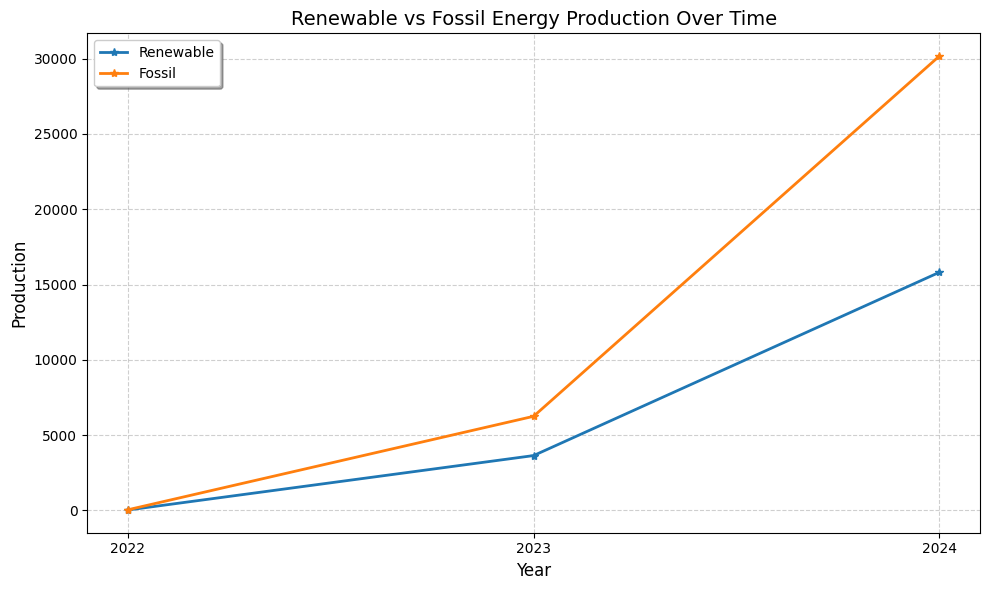

In [26]:
##1 renewable vs fossil energy production over time

renewable_yearly["Year"] = renewable_yearly["Year"].astype(int)
fossil_yearly["Year"] = fossil_yearly["Year"].astype(int)

plt.figure(figsize=(10,6))

# Plot for both lines
plt.plot(renewable_yearly["Year"], renewable_yearly["Renewable_Total"], 
         label="Renewable", marker="*", linewidth=2)
plt.plot(fossil_yearly["Year"], fossil_yearly["Fossil_Total"], 
         label="Fossil", marker="*", linewidth=2)

# Titles and labels
plt.title("Renewable vs Fossil Energy Production Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Production", fontsize=12)

# Having a clean x-axis ticks
plt.xticks(renewable_yearly["Year"])  

plt.legend(loc="best", shadow=True)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
# plt.savefig('renewable vs fossil energy production over time.tiff')
plt.savefig("renewable_vs_fossil_energy_production_over_time.png", dpi=300, bbox_inches="tight")
plt.show()



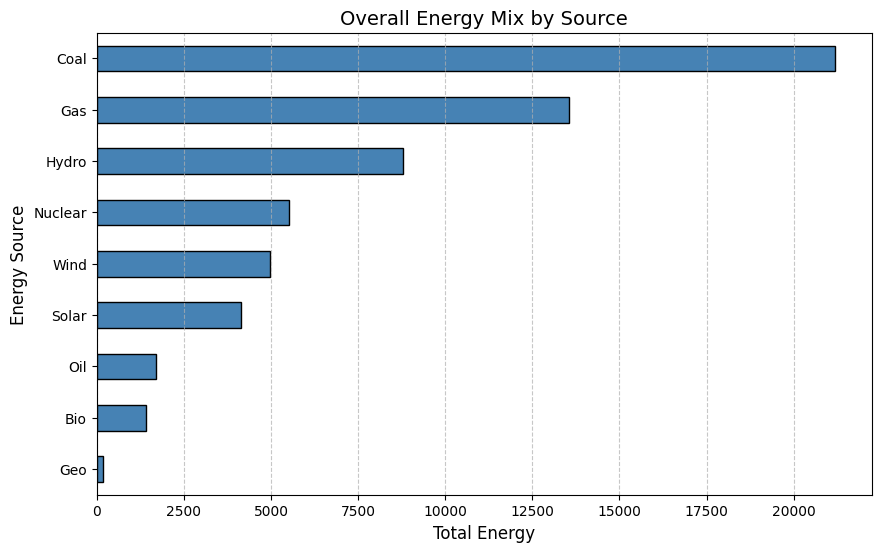

In [27]:
## overall energy mix by source

# Sum across the dataframe for each energy source
source_totals = new_energy_df[energy_sources].sum()

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
source_totals.sort_values().plot(kind="barh", color="steelblue", edgecolor="black")

plt.title("Overall Energy Mix by Source", fontsize=14)
plt.xlabel("Total Energy", fontsize=12)
plt.ylabel("Energy Source", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
# plt.savefig('overall energy mix by source.tiff')
plt.savefig("overall_energy_mix_by_source.png", dpi=300, bbox_inches="tight")
plt.show()
